<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/students_doubts/Projeto_02_V_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os 
import cv2
import re, random

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random

In [2]:
!gdown --id 10J-55dzHWhMHyrGbZXy5mrQF3hm2uSEH #comando que baixa do google drive o arquivo de id 10J-55dzHWhMHyrGbZXy5mrQF3hm2uSEH

Downloading...
From: https://drive.google.com/uc?id=10J-55dzHWhMHyrGbZXy5mrQF3hm2uSEH
To: /content/APeixe.zip
120MB [00:01, 98.7MB/s]


In [3]:
import zipfile
file_name = zipfile.ZipFile('APeixe.zip', 'r')
file_name.extractall()

In [4]:
#Colocar todas as imagens do arquivo APeixe em img_name e x_original
FILE='APeixe.zip'
img_name=[] #armazena o nome da foto em uma lista
x_original = [] #armazerna a foto no formato original em uma lista, optei por trabalhar com colorido porque o salmonete eh parecido com
#a espadilha, a diferenca desses peixes eh mais facilmente observada pela cor
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x_original.append(cv2.resize(cv2.imread(name),(590,445))) #o artigo menciona que as fotos foram tiradas com duas camaras de resolucao diferente
        #entao eh necessario fazer um resize das fotos, o artigo menciona 590x445
        #o artigo conta originalmente com 9 classes de pescados a serem classificados
        #com o intuito de economizar tempo computacional eu selecionei apenas 4 das 9 classes
        #decidi por classificar a dourada, a espadilha, o robalo e o salmonete

Text(0.5, 1.0, 'Robalo19.JPG')

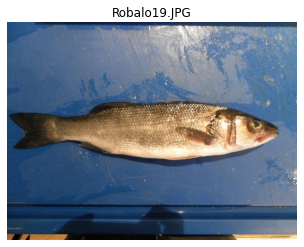

In [20]:
Ind = 110
#img=plt.imread(img_name[Ind])
name = img_name[Ind]
img= cv2.imread(name)
plt.axis("off")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.title(img_name[Ind])
#a resolucao da foto 110 (e provavelmente outras) ficou(ficaram) boa (boas)

In [6]:
y_names = [] # colocou as tres primeiras letras e colocou na lista de todas as imagens
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [7]:
unique_list = []    
for yy in y_names: #criacao das listas da ann
  if yy not in unique_list:
    unique_list.append(yy)
unique_list #criou as categorias dos peixes

['Dou', 'Esp', 'Rob', 'Sal']

In [8]:
n = len(unique_list)
y = [] #lista em branco
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

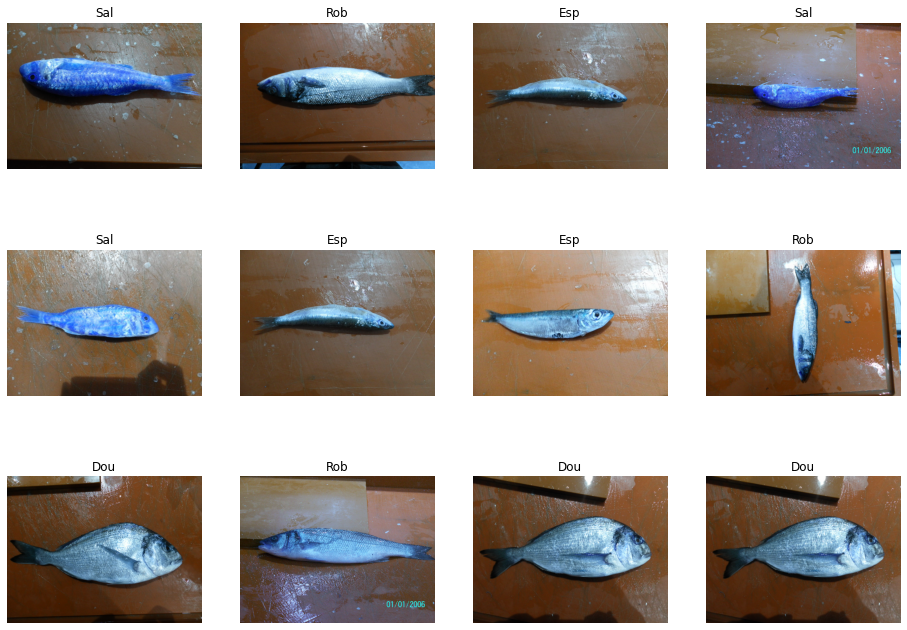

In [9]:
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(12): #mostra fotos aleatorias da biblioteca
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_original[kk])
  plt.title(y_names[kk])
  plt.axis("off")

In [10]:
x_data = []
for xx in x_original:
  x_data.append(xx.ravel()) #transforma as fotos/matrizes em linhas (Esse eh um comando que demora um pouco para ser executado)

X = pd.DataFrame(x_data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3) #separando os dataset em test e train

In [12]:
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X) #normalizar
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [13]:
model = MLPClassifier(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(18),
                      max_iter=1000,random_state=1) #implementacao da ANN

In [14]:
model.fit(X_train, y_train) #esse eh outro comando que demora para ser executado

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=18, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [15]:
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [16]:
df = pd.DataFrame({'true':y_train,'calc':y_calc_train})
print(pd.crosstab(df['true'],df['calc'])) #matriz confusao dos dados de treino da ANN
#bons resultados porque formou uma matriz diagonal

calc   0   1   2   3
true                
0     38   0   0   0
1      0  40   0   0
2      0   0  43   0
3      0   0   0  39


In [17]:
df = pd.DataFrame({'true':y_test,'calc':y_calc_test})
print(pd.crosstab(df['true'],df['calc'])) #matriz confusado dos dados de teste
#Nao eh uma matriz diagonal, isso indica que a ann 'confundiu' na hora de classificar as imagens

calc  0  1  2   3
true             
0     8  0  0   4
1     1  8  0   1
2     0  0  6   1
3     0  0  0  11


In [18]:
y_true = y_test
y_pred = y_calc_test
target_names = ['Dourada', 'Espadilha', 'Robalo', 'Salmonete']
print(classification_report(y_true, y_pred, target_names=target_names))
#matriz confusao com a acuracia global do problema de 0.88

              precision    recall  f1-score   support

     Dourada       0.89      0.67      0.76        12
   Espadilha       1.00      0.80      0.89        10
      Robalo       1.00      0.86      0.92         7
   Salmonete       0.65      1.00      0.79        11

    accuracy                           0.82        40
   macro avg       0.88      0.83      0.84        40
weighted avg       0.87      0.82      0.83        40

